# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [7]:
#libraries
import pandas as pd
import scipy.stats as st
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the proper test and, with 5% significance, comment your findings.

In [6]:
# checking if the the distribution is normal

dragon_hp = df[df["Type 1"] == "Dragon"]["HP"]
grass_hp  = df[df["Type 1"] == "Grass"]["HP"]


hp_df = pd.DataFrame({
    "HP": pd.concat([dragon_hp, grass_hp]),
    "Type": ["Dragon"] * len(dragon_hp) + ["Grass"] * len(grass_hp)
})

fig = px.histogram(
    hp_df,
    x="HP",
    color="Type",
    barmode="overlay",
    nbins=15,
    title="Histogram of HP: Dragon vs Grass"
)
fig.show()



- The distribution is approximately normal and has a positive / right skew

### QQ Plot to check the above interpretation

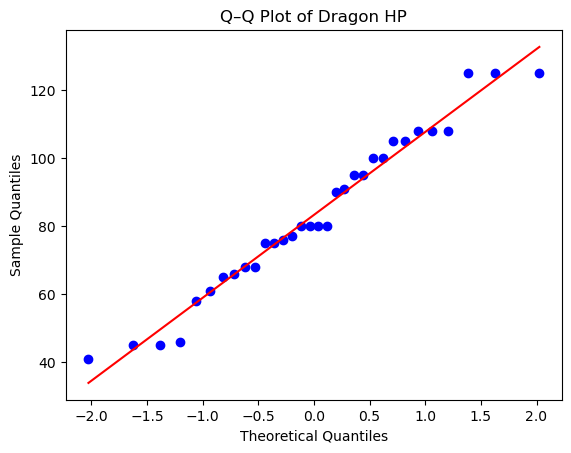

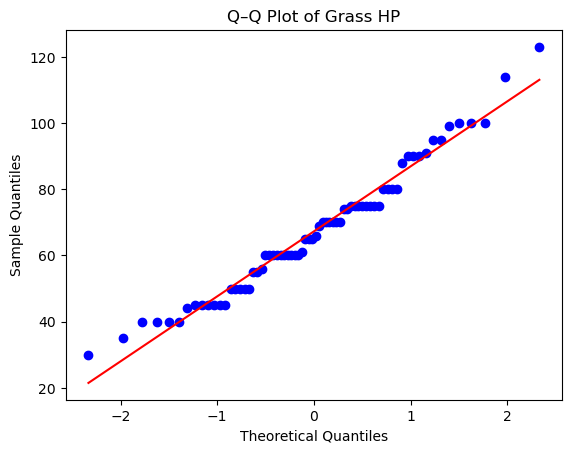

In [9]:
# Dragon HP Q–Q plot
stats.probplot(dragon_hp, dist="norm", plot=plt)
plt.title("Q–Q Plot of Dragon HP")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# Grass HP Q–Q plot
stats.probplot(grass_hp, dist="norm", plot=plt)
plt.title("Q–Q Plot of Grass HP")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

- The Q–Q plots are linear, suggesting that HP values for both Dragon and Grass Pokémon are normally distributed, confirming the previous findings.

### Hypothesis Testing

#### One-sided independent two-sample t-test

- H0 - Pokemon type Dragons do not have have more HP than type Grass
- Ha - Pokemon type Dragons have have more HP than type Grass

In [12]:
alpha = 0.05

from scipy import stats

#welch's test
t_stat, p_two_sided = stats.ttest_ind(dragon_hp, grass_hp, equal_var=False)
print(t_stat, p_two_sided)

# one-sided test

# H1: mean(dragon) > mean(grass)
if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - (p_two_sided / 2)

print(p_one_sided)

if p_one_sided < alpha:
    print("Reject H0: Pokemon type Dragons have have more HP than type Grass.")
else:
    print("Fail to reject H0: Pokemon type Dragons do not have have more HP than type Grass.")

3.3349632905124063 0.0015987219490841195
0.0007993609745420597
Reject H0: Pokemon type Dragons have have more HP than type Grass.


- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the proper test and, with 5% significance, comment your findings.


### ANOVA 

- H0 - Legendary and Non-Legendary Pokémon have the same amount of stats
- Ha - Legendary and Non-Legendary Pokémon have different stats

In [ ]:
# Select stats columns
stats_cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

df_anova = df[stats_cols + ["Legendary"]].dropna()

# Convert Legendary to categorical
df_anova["Legendary"] = df_anova["Legendary"].astype("category")


In [ ]:
alpha = 0.05 

from statsmodels.multivariate.manova import MANOVA

maov = MANOVA.from_formula(
    "HP + Attack + Defense + Q('Sp. Atk') + Q('Sp. Def') + Speed ~ Legendary", #column names with soaces are wrapped in Q)
    data=df_anova
)

print(maov.mv_test())


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0592 6.0000 793.0000 2100.8338 0.0000
         Pillai's trace  0.9408 6.0000 793.0000 2100.8338 0.0000
 Hotelling-Lawley trace 15.8953 6.0000 793.0000 2100.8338 0.0000
    Roy's greatest root 15.8953 6.0000 793.0000 2100.8338 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          Legendary        Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.7331 6.0000 793.0000 48.1098 0.0000
            Pillai's trace 0.2669 6.0000 793.

- Pr > F values (p-value) for all the tests are less than 0.05, so we reject the null-hypothesis.
- Legendary and Non-Legendary Pokémon have different stats

**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 34)
- Hospital coordinates (-122, 37)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 

In [20]:
SCHOOL = (-118.0, 34.0) 
HOSP   = (-122.0, 37.0)   
THRESH = 0.50 #close if distance is less than 0.50

# Euclidean distance function
def euclid_dist(lon, lat, lon0, lat0):
    return np.sqrt((lon - lon0)**2 + (lat - lat0)**2)

# calc the distance to school and hospital
df2 = df.copy()

df2["dist_school"] = euclid_dist(df2["longitude"], df2["latitude"], SCHOOL[0], SCHOOL[1])
df2["dist_hospital"] = euclid_dist(df2["longitude"], df2["latitude"], HOSP[0], HOSP[1])

# nearest, school or hospital?
df2["min_dist"] = df2[["dist_school", "dist_hospital"]].min(axis=1)

# creating near and far groups
df2["close"] = df2["min_dist"] < THRESH

close_vals = df2.loc[df2["close"], "median_house_value"].dropna()
far_vals   = df2.loc[~df2["close"], "median_house_value"].dropna()


### Hypothesis Testing

- H0 - Houses close to a school or hospital are not expensive
- Ha - Houses close to a school or hospital are expensive

In [21]:
from scipy import stats

alpha = 0.05

# One-sided Welch two-sample t-test 
t_stat, p_two_sided = stats.ttest_ind(close_vals, far_vals, equal_var=False)

# convert to one-sided p-value for the direction, close > far
if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - (p_two_sided / 2)

alpha = 0.05
print("Welch t-stat:", t_stat)
print("one-sided p-value:", p_one_sided)

if p_one_sided < alpha:
    print("Reject H0 : Houses close to a school or hospital are expensive")
else:
    print("Fail to reject H0 (5%): Houses close to a school or hospital are not expensive")

Welch t-stat: 37.992330214201516
one-sided p-value: 1.5032478884296307e-301
Reject H0 : Houses close to a school or hospital are expensive
